Followed the requirements for the Datacamp unguided project "Analyzing TV Data." The dataset for this version is slightly different than what is used in the Datacamp shell. Datacamp requires a specific format, so the data used and the method are a little different. I did this one first, and this is my own code. 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = [11, 7]

In [23]:
print(os.getcwd())#checking that directory is correct
print(os.listdir())#checking that file is in my directory for the pd.read_csv call to work

C:\Users\jam43\DataCamp jupyter notebooks
['.ipynb_checkpoints', 'Datacamp -  Intermediate Python Skill Check.ipynb', 'Datacamp -  Intro Python Skill Check.ipynb', 'Datacamp - Hacker Statistics case study.ipynb', 'Datacamp - Intermediate Importing Data into Python.ipynb', 'Datacamp - Intermediate Python course.ipynb', 'Datacamp - Intro to importing data files in python.ipynb', 'Datacamp - Introduction to Python course.ipynb', 'DataCamp - TV Statistics Project - Unguided - done the Datacamp way.ipynb', 'Datacamp - TV Statistics Project .ipynb', 'the_office_series.csv']


In [24]:
officedf = pd.read_csv('the_office_series.csv', sep = ',', index_col=0)

officedf.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [25]:
#The NaN only occur in the column for Guest stars. Dropping all NaN for a new df that is only the Guest Stars
guests = officedf.dropna()
print(len(guests)) #To see how many episodes have Guest stars

29


In [26]:
officedf = officedf.fillna(value=' ') #Fixing the main df to not include the NaN for blanks for guest stars.

officedf.columns = officedf.columns.str.lower()
    
officedf.head()

,season,episodetitle,about,ratings,votes,viewership,duration,date,gueststars,director,writers
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,,Ken Kwapis,B. J. Novak
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,,Bryan Gordon,Michael Schur
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,,Greg Daniels,Greg Daniels


In [27]:
print(officedf['ratings'].describe())

count    188.000000
mean       8.237234
std        0.589930
min        6.600000
25%        7.800000
50%        8.200000
75%        8.600000
max        9.800000
Name: ratings, dtype: float64


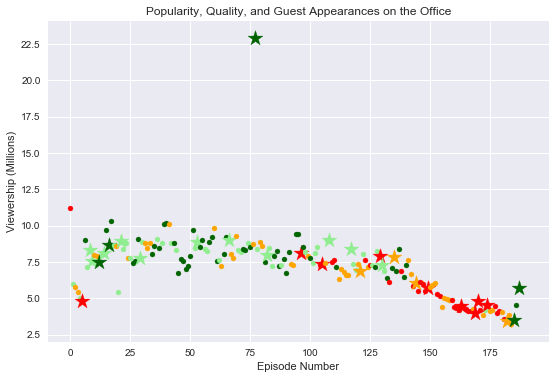

In [35]:
fig = plt.figure()
plt.style.use('fast')

x = officedf.index
y = officedf.viewership

colors = []
for i in officedf.ratings:
    if i < 8.6:
        if i < 7.8:
            colors.append('red')
        elif i >= 7.8 and i < 8.2:
            colors.append('orange')
        else: 
            colors.append('lightgreen')
    else: 
        colors.append('darkgreen')

sizes = []
for i in officedf.gueststars:
    if i != ' ':
        sizes.append(250)
    else:
        sizes.append(25)
        
markers = []
for i in officedf.gueststars:
    if i != ' ':
        markers.append('*')
    else:
        markers.append('o')
        

for i in x:
    plt.scatter(x[i], y[i], c=colors[i], s=sizes[i], marker=markers[i])
    
    
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

In [29]:
officedf[officedf['viewership'] == officedf['viewership'].max()]['gueststars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: gueststars, dtype: object

In [30]:
top_star = 'Jessica Alba'